# Week 0

- Learned the basics of jupyter
- Imported everything to jupyter
- Divided some files in smaller ones to keep the code a little bit cleaner
- It is now possible to select what file do you want the data to come from directly from the code
- Gan is not working correctly, dicovered that this happens because the output of the generator is scalated to be in the interval [0,1]

# Week 1

- It is now possible to vizualize the error growth
- Example of error growth in the diabetes database, the blue line is the discriminator error and the red line is the generator error:
![alt text](./images/diabetes/error.png "error growth")
- The points created by the generator are now saved in a .csv file
- Created histograms to compare the fake data and the real one in the diabetes database
- The images below compare the values distribution of the real (blue) and the fake (red) diabetes data. Note that I am not comparing positive and negative results, only if the distribution of the fake data is close to the real.


In [1]:
from compare_data import *
compare_data("original_data/diabetes.csv", "report/diabetes_999.csv", 5000, "show")

Pima Indians Diabetes Database 

Normal 65.1 %  of the dataset
Diabets 34.9 %  of the dataset


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# Week 2

- Implemented a Decision Tree classifier to compare and evaluate the "quality" of the fake data
- The examples below used the diabetes database and the fake data generated last week

Prediction error:  0.26521739130434785


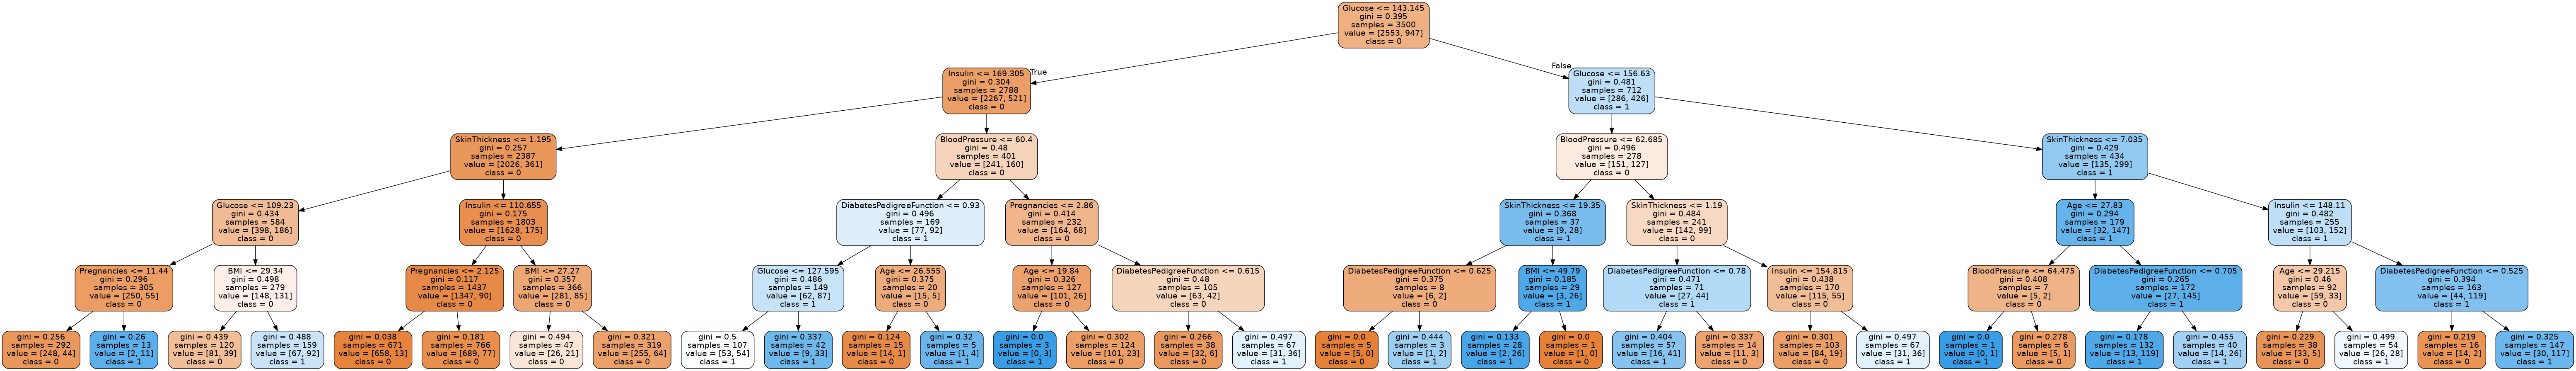

In [5]:
from decision_tree import *
import pandas as pd

data = pd.read_csv("original_data/diabetes.csv")
fake_data = pd.read_csv("report/diabetes_999.csv")

#Treating the fake data
fake_data = fake_data.tail(5000)
fake_data.loc[fake_data.Outcome >= 0.5, 'Outcome'] = 1
fake_data.loc[fake_data.Outcome < 0.5, 'Outcome'] = 0

# Creating set of training and test data for both fake and original datasets
original_data_training_set = data.head(int(data.shape[0]*0.7))
fake_data_training_set  = fake_data.head(int(fake_data.shape[0]*0.7))
original_data_testing_set  = data.tail(int(data.shape[0]*0.3))
fake_data_testing_set  = fake_data.tail(int(fake_data.shape[0]*0.3))

create_and_evaluate_DT(fake_data_training_set, original_data_testing_set)

import pydotplus # Decision tree plotting
from IPython.display import Image
g = pydotplus.graph_from_dot_file(path="tree.dot")
Image(g.create_png())

# Week 3-4

- Possible to load/save model
- Possible to create csv file using saved model
- Tested different architetures for all the DBs
- Some results can be seen below using the following archs:
    - Diabetes and Data DBs used 1500 epochs of training
    - CreditCard used 3 because its size was 500x bigger
    - Batchs had size 5 and the lr=0.0002
    - the layers are as follows:
        - fake0: 256,512,1025
        - fake1: 256,512
        - fake2: 256
        - fake3: 128,256,512
        - fake4: 128,256
        - fake5: 128

### Diabetes

| Database  | Proportion    | Test Error    |
| --------- | ---------:    | :---------    |
| original  | 64.8/35.2     | 0.2522        |
| fake0     | 69.83/30.17   | 0.6565        |
| fake1     | 69.09/30.91   | 0.5391        |
| fake2     | 65.18/34.82   | 0.6565        |
| fake3     | 65.92/34.08   | 0.6565        |
| fake4     | 63.13/36.87   | 0.4652        |
| fake5     | 68.72/31.28   | 0.6217        |


### Diabetes Scalonated

| Database  | Proportion    | Test Error    |
| --------- | ---------:    | :---------    |
| original  | 64.8/35.2     | 0.2522        |
| fake0     | 71.69/28.31   | 0.3           |
| fake1     | 67.23/32.77   | 0.4522        |
| fake2     | 67.6/32.4     | 0.2522        |
| fake3     | 60.15/39.85   | 0.3391        |
| fake4     | 65.18/34.82   | 0.2609        |
| fake5     | 68.9/31.1     | 0.313         |

### Data

| Database  | Proportion    | Test Error    |
| --------- | ---------:    | :---------    |
| original  | 56.53/43.47   | 0.1176    |
| fake0_layer-3_lr-0.0002_arc-256,512,102_size-569.csv      | 100.0/0       | 0.2294    |
| fake0_layer-2_lr-0.0002_arc-256,51_size-569.csv           | 100.0/0       | 0.2294    |
| fake1_layer-2_lr-0.0002_arc-256,51_size-569.csv           | 100.0/0       | 0.2294    |
| fake1_layer-1_lr-0.0002_arc-25_size-569.csv               | 0/100.0       | 0.7706    |
| fake2_layer-2_lr-0.0002_arc-128,25_size-569.csv           | 100.0/0       | 0.2294    |
| fake2_layer-1_lr-0.0002_arc-25_size-569.csv               | 100.0/0       | 0.2294    |
| fake3_layer-3_lr-0.0002_arc-128,256,51_size-569.csv       | 100.0/0       | 0.2294    |
| fake3_layer-1_lr-0.0002_arc-12_size-569.csv               | 100.0/0       | 0.2294    |
| fake4_layer-2_lr-0.001_arc-256,51_size-569.csv            | 100.0/0       | 0.2294    |
| fake4_layer-2_lr-0.0002_arc-128,25_size-569.csv           | 100.0/0       | 0.2294    |
| fake5_layer-1_lr-0.001_arc-25_size-569.csv                | 83.42/16.58   | 0.2294    |
| fake5_layer-1_lr-0.0002_arc-12_size-569.csv               | 0/100.0       | 0.7706    |
| fake6_layer-2_lr-0.001_arc-128,25_size-569.csv            | 4.27/95.73    | 0.2294    |
| fake7_layer-1_lr-0.001_arc-12_size-569.csv                | 52.76/47.24   | 0.2294    |
| fake8_layer-2_lr-0.0005_arc-256,51_size-569.csv           | 100.0/0       | 0.2294    |
| fake9_layer-1_lr-0.0005_arc-25_size-569.csv               | 100.0/0       | 0.2294    |
| fake10_layer-2_lr-0.0005_arc-128,25_size-569.csv          | 100.0/0       | 0.2294    |
| fake11_layer-1_lr-0.0005_arc-12_size-569.csv              | 0/100.0       | 0.7706    |


### Data Scalonated

| Database  | Proportion    | Test Error    |
| --------- | ---------:    | :---------    |
| original  | 56.53/43.47   | 0.1118        |
| fake0     | 52.26/47.74   | 0.1824        |
| fake1     | 56.28/43.72   | 0.0588        |
| fake2     | 56.78/43.22   | 0.0941        |
| fake3     | 54.02/45.98   | 0.0471        |
| fake4     | 58.04/41.96   | 0.0647        |
| fake5     | 54.27/45.73   | 0.0882        |

### Credit Card

| Database  | Proportion    | Test Error    |
| --------- | ---------:    | :---------    |
| original  | 99.81/0.19    | 0.0006        |
| fake0     | 100.0/0       | 0.0013        |
| fake1     | 100.0/0       | 0.0013        |
| fake2     | 98.98/1.02    | 0.0013        |
| fake3     | 96.29/3.71    | 0.1906        |
| fake4     | 0/100.0       | 0.9987        |
| fake5     | 100.0/0       | 0.0013        |

### Credit Card Scalonated

| Database  | Proportion    | Test Error    |
| --------- | ---------:    | :---------    |
| original  | 99.81/0.19    | 0.0006        |
| fake0     | 100.0/0       | 0.0013        |
| fake1     | 100.0/0       | 0.0013        |
| fake2     | 100.0/0       | 0.0013        |
| fake3     | 100.0/0       | 0.0013        |
| fake4     | 100.0/0       | 0.0013        |
| fake5     | 100.0/0       | 0.0013        |


In [4]:
from compare_data import *
original="original_data/data_escalonated.csv"
fake="fake_data/data_escalonated/0_epochs-3_layer-3_lr-0.0002_batch-5_arc-256,512,102_size-569.csv"
create_comparing_table(original, fake)

['fake_data', 'data_escalonated', '0_epochs-3_layer-3_lr-0.0002_batch-5_arc-256,512,102_size-569.csv']
| Database 	| Proportion 	| Test Error 	|
| ---------	| ---------: 	| :--------- 	|
| original 	| 56.53/43.47 	| 0.1176 	|
| fake0 	| 52.26/47.74 	| 0.2353 	|


test

a b 

dfafdas